# Flourescence Processing Lite Demo

### Run through this demo and change the path and paths variables to locations on your computer to analyze your own assays 

### Importing Important Functions

In [3]:
import pandas as pd
import numpy as np
import os
import glob
from skimage import io 
import matplotlib.pyplot as plt
import javabridge
import bioformats
import vsi_metadata as v
import fluorescence_processing as f
import plots as pl


# 1. Analyze Data For One Assay

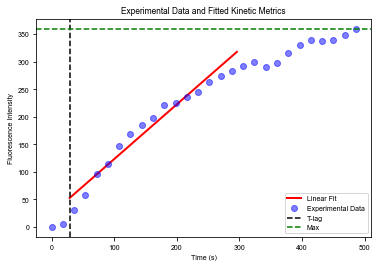

In [30]:
path="F:/2020-9-24 Coag With Peptides/A1 - 10X_01.vsi"
fluorescence_data,metrics=f.fluorescence_time_series(path,show_linear=True,vsi=True,stats=True,t_lag_level=20)

### we can get a look at the first 5 rows of the dataframe by using the '.head()' function

In [15]:
fluorescence_data.head()

,Time (s),Mean,Zero Mean,Min,Max
0,0.0,103.850297,0.000000,87.0,186.0
1,18.0,108.302181,4.451883,90.0,1009.0
2,36.0,134.225025,30.374727,97.0,1788.0
3,54.0,161.742975,57.892678,103.0,2655.0
4,72.0,199.124362,95.274065,102.0,3158.0


In [16]:
metrics

,F T-lag,F Max,F Slope
0,239.0,358.891252,0.594413


# 2. Plot data using matplotlib and seaborn

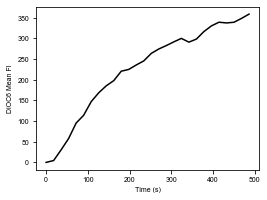

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns 

font=dict(family='Arial',size='7') # modify font using this and below line
plt.rc('font',**font)

f1=plt.figure(1,figsize=(4,3)) 3 # declare a figure using plt, specific the size in inches
sns.lineplot(x='Time (s)',y='Zero Mean', color='k',data=master_time_series) # call the lineplot function to plot the time series data using the dataframe, make the line color black
plt.ylabel('DiOC6 Mean FI') # change the label
f1.savefig('mini_bulk_analysis_demo_fourescence.png',dpi=300) # save figures as svg and png at 300 dpi
f1.savefig('mini_bulk_analysis_demo_fourescence.svg',dpi=300)


# 3. Analyze Multiple assays at once
- here I am using the "assays" list to store an assay number. This is used to distinguish each one of the assays since at the end of the analysis we are lumping them all into one big dataframe and need to distinguish them
- I add these distingishers in when I declare the "Assay No" columns
- I could use another distinguisher instead that are appropriate for whatever experiment conditions
- For example I could make a list called treatments using the code

- then I could add these distinguishers in the loop below by saying:

- but just for a demo putpose here I just use the assays variable and 'Assay No' a a column name in te dataframes 

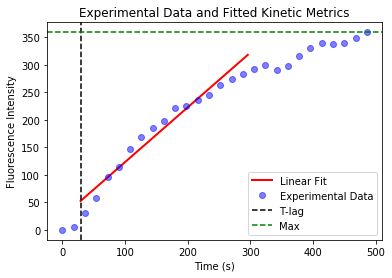

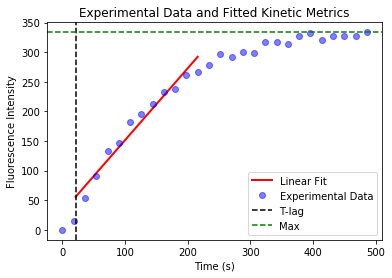

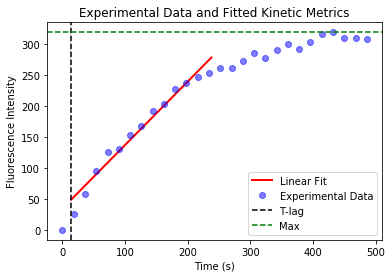

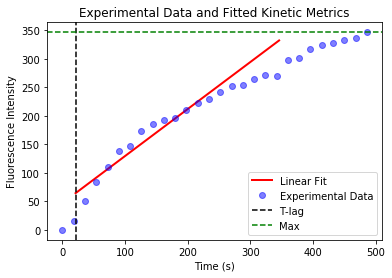

In [7]:
paths=["F:/2020-9-24 Coag With Peptides/A1 - 10X_01.vsi", # specify paths list that contains the filepath of all the vsis we want to analyze
       "F:/2020-9-24 Coag With Peptides/A1 - 10X_02.vsi",
       "F:/2020-9-24 Coag With Peptides/A1 - 10X_03.vsi",
       "F:/2020-9-24 Coag With Peptides/A1 - 10X_04.vsi"
      ]
assays=[1,2,3,4] # list of the assay number as a disnguisher
master_time_series=pd.DataFrame() # declaring 2 dataframes to store all of our analysis for the time series and metrics in respecitvely 
master_metrics=pd.DataFrame()
for i in range(len(paths)):
    fluorescence_data,metrics=f.fluorescence_time_series(paths[i],show_linear=True,vsi=True,stats=True,t_lag_level=20,meta_number=1) # call the fluorescence_time series function to analyze data
    fluorescence_data['Assay No']=[assays[i]]*len(fluorescence_data) # add an additional column to the indiviual assay we just analyzed by calling the assays list
    metrics['Assay No']=[assays[i]]*len(metrics)
    master_time_series=master_time_series.append(fluorescence_data,ignore_index=True) # appen the 2 master dataframes to store all the individual assays together
    master_metrics=master_metrics.append(metrics,ignore_index=True)

# 4. Plot multiple assays over one another in a seaborn lineplot
- here since we have all the time series data lumped together with one dataframe, all we need to do to plot them one by one is add the additional variable into the lineplot function to plot the different assays as different colors

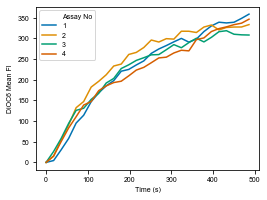

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 

font=dict(family='Arial',size='7') # modify font using this and below line
plt.rc('font',**font)

palette=sns.color_palette('colorblind',len(master_time_series['Assay No'].unique()))
f1=plt.figure(1,figsize=(4,3))  # declare a figure using plt, specific the size in inches
sns.lineplot(x='Time (s)',y='Zero Mean', hue='Assay No',data=master_time_series,palette=palette) # call the lineplot function to plot the time series data using the dataframe
plt.ylabel('DiOC6 Mean FI') # change the label
f1.savefig('mini_bulk_analysis_demo_fourescence.png',dpi=300) # save figures as svg and png at 300 dpi
f1.savefig('mini_bulk_analysis_demo_fourescence.svg',dpi=300)

# 5. Plot summary statistics from the multiple assays.
- here we are plotting the slope, lag time, and max that the fluorescence_time_series function computed for us

### max FI

(0, 394.78037724494936)

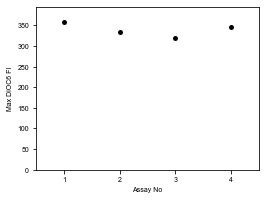

In [23]:
f_max=plt.figure(1,figsize=(4,3)) # make figure to store data in
sns.swarmplot(x='Assay No', y='F Max', data= master_metrics, color='k') #swarmplot allows us to plot swarms of data points with discrete or continuous variables
plt.ylabel('Max DiOC6 FI') # change ylabel
plt.ylim([0,1.1*master_metrics['F Max'].max()]) # 

(0, 1.333791426217878)

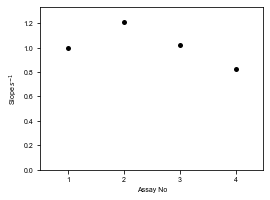

In [24]:
f_slope=plt.figure(1,figsize=(4,3))
sns.swarmplot(x='Assay No', y='F Slope', data= master_metrics,color='k')
plt.ylabel('Slope $s^{-1}$')
plt.ylim([0,1.1*master_metrics['F Slope'].max()])

(0, 31.900000000000002)

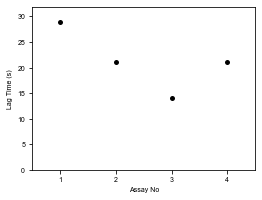

In [25]:
f_t_lag=plt.figure(1,figsize=(4,3))
sns.swarmplot(x='Assay No', y='F T-lag', data= master_metrics, color='k')
plt.ylabel('Lag Time (s)')
plt.ylim([0,1.1*master_metrics['F T-lag'].max()])

## Plot metrics in one big plot

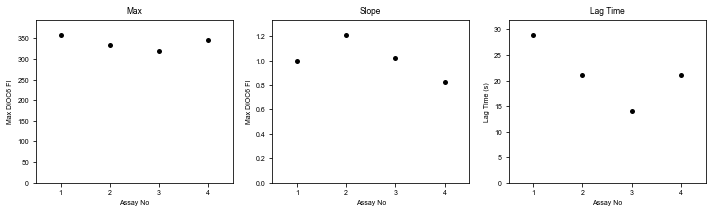

In [31]:
big_plot=plt.figure(4,figsize=(12,3)) # make a large figure 3x as wide as the previous ones

plt.subplot(1,3,1) # we declare plt.subplot(max_rows,max_cols,plot number) to divide up this whole figure into subplots
# plot the individual plots using this subplot method then saving the figure as before
plt.title('Max')
sns.swarmplot(x='Assay No', y='F Max', data= master_metrics, color='k')
plt.ylabel('Max DiOC6 FI')
plt.ylim([0,1.1*master_metrics['F Max'].max()])

plt.subplot(1,3,2)
plt.title('Slope')
sns.swarmplot(x='Assay No', y='F Slope', data= master_metrics,color='k')
plt.ylabel('Max DiOC6 FI')
plt.ylim([0,1.1*master_metrics['F Slope'].max()])

plt.subplot (1,3,3)
plt.title('Lag Time')
sns.swarmplot(x='Assay No', y='F T-lag', data= master_metrics, color='k')
plt.ylabel('Lag Time (s)')
plt.ylim([0,1.1*master_metrics['F T-lag'].max()])

big_plot.savefig('combned_analysis_all_metrics_plot.svg',dpi=300)
big_plot.savefig('combned_analysis_all_metrics_plot.png',dpi=300)